In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
print(f"Training data shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Testing data shape: {test_images.shape}")
print(f"Testing labels shape: {test_labels.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


In [6]:
# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

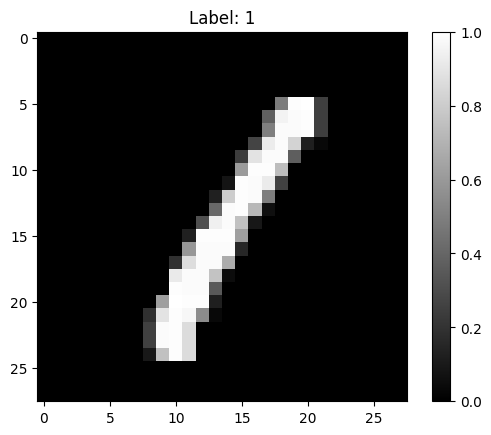

In [9]:
plt.figure()
plt.imshow(train_images[3], cmap='gray')
plt.title(f"Label: {train_labels[3]}")
plt.colorbar()
plt.grid(False)
plt.show()

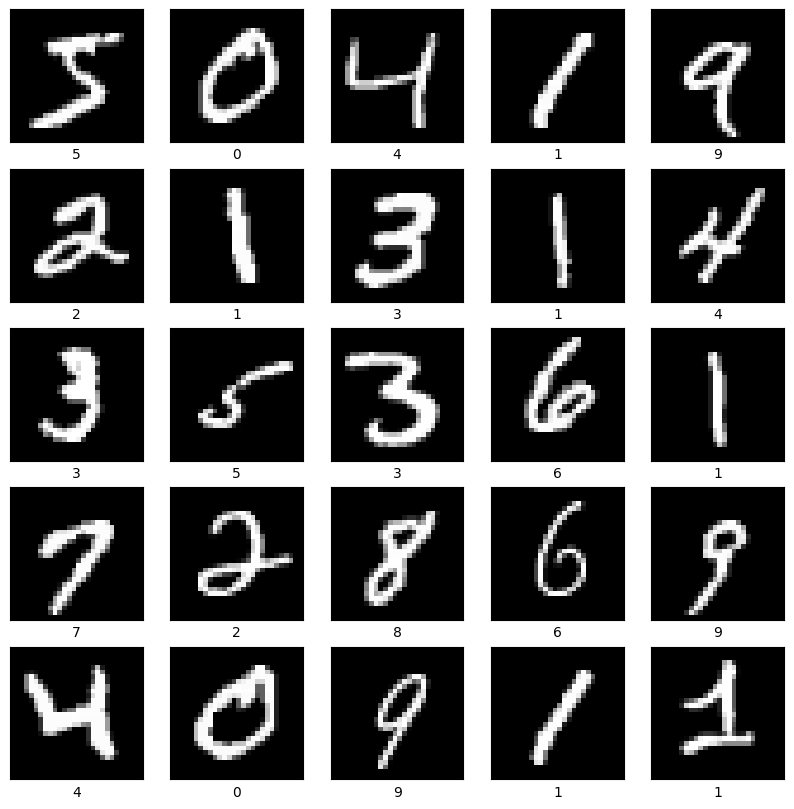

In [10]:
# Display more samples from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

In [15]:
# Build a more complex model using convolutional layers
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),   # Reshape input to add channel dimension
    layers.Conv2D(32, (3, 3), activation='relu'),        # Convolutional layer with 32 filters and 3x3 kernel
    layers.MaxPooling2D((2, 2)),                         # Max pooling layer with 2x2 pool size
    layers.Conv2D(64, (3, 3), activation='relu'),        # Convolutional layer with 64 filters and 3x3 kernel
    layers.MaxPooling2D((2, 2)),                         # Max pooling layer with 2x2 pool size
    layers.Flatten(),                                    # Flatten the 3D output to 1D
    layers.Dense(128, activation='relu'),                # Fully connected layer with 128 units
    layers.Dropout(0.5),                                 # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')               # Output layer with 10 units for classification
])

In [16]:
# Compile the model
model.compile(optimizer='adam',                 # Optimizer
              loss='sparse_categorical_crossentropy',  # Loss function for integer labels
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.1249 - accuracy: 0.9643 - val_loss: 0.0472 - val_accuracy: 0.9873
Epoch 2/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0763 - accuracy: 0.9771 - val_loss: 0.0376 - val_accuracy: 0.9888
Epoch 3/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0584 - accuracy: 0.9826 - val_loss: 0.0365 - val_accuracy: 0.9897
Epoch 4/10
1688/1688 [==============================] - 52s 31ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0388 - val_accuracy: 0.9897
Epoch 5/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0383 - accuracy: 0.9891 - val_loss: 0.0310 - val_accuracy: 0.9922
Epoch 6/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0336 - accuracy: 0.9898 - val_loss: 0.0318 - val_accuracy: 0.9913
Epoch 7/10
1688/1688 [==============================] - 54s 32ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0329 -

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - loss: 0.0275 - accuracy: 0.9919 - 3s/epoch - 9ms/step

Test accuracy: 0.9919000267982483


In [20]:
model.save('mnist_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
